<a href="https://colab.research.google.com/github/d-chacon/Ciencia_Datos_Taller_3/blob/main/Taller_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Taller 3**
## **Integrantes:**
  - Daniela Chacón – 201910858
  - Esteban Ortiz - 201913613
  - Manuel Porras - 201913911
  - Angie Rincón - 201114323

# **0. Contexto de Negocio**
El área de fidelización de una empresa de telecomunicaciones tiene como una de sus metas disminuir la tasa de churn (abandono) por parte de sus clientes. Por esta razón, desea construir modelos de machine learning que permitan predecir si un cliente es propenso abandonar los servicios que actualmente tiene contratados con la empresa. Una vez construidos, estos modelos deben ser disponibilizados a través de una API REST que pueda ser consumida por la plataforma que es usada por los asesores de call center usando dicha predicción para ofrecer nuevos productos o servicios a los clientes más propensos al abandono.

Para cada cliente de la empresa se cuenta con la siguiente información:

|Field | Description |
|------|-------------|
|customerID | Customer ID |
| gender | Whether the customer is a male or a female |
| SeniorCitizen | Whether the customer is a senior citizen or not (1, 0) |
| Partner | Whether the customer has a partner or not (Yes, No) |
|Dependents | Whether the customer has dependents or not (Yes, No) |
| tenure | Number of months the customer has stayed with the company |
| PhoneService | Whether the customer has a phone service or not (Yes, No) |
| MultipleLines | Whether the customer has multiple lines or not (Yes, No, No phone service) |
| InternetService  |Customer’s internet service provider (DSL, Fiber optic, No) |
| OnlineSecurity | Whether the customer has online security or not (Yes, No, No internet service) |
| OnlineBackup | Whether the customer has online backup or not (Yes, No, No internet service) |
| DeviceProtection | Whether the customer has device protection or not (Yes, No, No internet service) |
| TechSupport | Whether the customer has tech support or not (Yes, No, No internet service) |
| StreamingTV | Whether the customer has streaming TV or not (Yes, No, No internet service) |
| StreamingMovies | Whether the customer has streaming movies or not (Yes, No, No internet service) |
| Contract | The contract term of the customer (Month-to-month, One year, Two year) |
| PaperlessBilling | Whether the customer has paperless billing or not (Yes, No) |
| PaymentMethod | The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)) |
| MonthlyCharges | The amount charged to the customer monthly |
| TotalCharges | The total amount charged to the customer |
| Churn | Whether the customer churned or not (Yes or No) |

## **0.1 Importacion de paquetes y datos**

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, precision_score, recall_score, f1_score, make_scorer, roc_auc_score, roc_curve , auc

import pickle

In [ ]:
pd.set_option("display.max_columns", None)

In [3]:
#Cargue de datos
churn_df = pd.read_json('https://raw.githubusercontent.com/d-chacon/Ciencia_Datos_Taller_3/main/data/churn_historic.json')

## **0.2 Análisis de calidad de datos**

Observamos que no existen datos nulos en ninguna de las columnas. El feature TotalCharges se mapeó como object, se convierte a float64; sin embargo, existen diez datos que tienen espacios en estos registros, por lo que hacer el cambio quedarán como nulos

In [ ]:
churn_df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
churn_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
churn_df.iloc[[288, 553, 736, 1040, 2831, 3215, 3669, 4507, 5859, 5943]]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
288,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
553,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
736,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1040,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
2831,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3215,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
3669,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
4507,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
5859,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No
5943,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No


In [ ]:
churn_df['TotalCharges'] = pd.to_numeric(churn_df['TotalCharges'], errors='raise')
indices_con_string = churn_df[pd.isna(churn_df['TotalCharges'])].index
indices_con_string

Index([288, 553, 736, 1040, 2831, 3215, 3669, 4507, 5859, 5943], dtype='int64')

In [ ]:
#Se valida que haya cambiado la columna correctamente
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        6000 non-null   object 
 1   gender            6000 non-null   object 
 2   SeniorCitizen     6000 non-null   int64  
 3   Partner           6000 non-null   object 
 4   Dependents        6000 non-null   object 
 5   tenure            6000 non-null   int64  
 6   PhoneService      6000 non-null   object 
 7   MultipleLines     6000 non-null   object 
 8   InternetService   6000 non-null   object 
 9   OnlineSecurity    6000 non-null   object 
 10  OnlineBackup      6000 non-null   object 
 11  DeviceProtection  6000 non-null   object 
 12  TechSupport       6000 non-null   object 
 13  StreamingTV       6000 non-null   object 
 14  StreamingMovies   6000 non-null   object 
 15  Contract          6000 non-null   object 
 16  PaperlessBilling  6000 non-null   object 


In [ ]:
for column in churn_df.columns:
  print(column, ": ", churn_df[column].unique())

customerID :  ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '1116-DXXDF' '9274-CNFMO'
 '7758-XKCBS']
gender :  ['Female' 'Male']
SeniorCitizen :  [0 1]
Partner :  ['Yes' 'No']
Dependents :  ['No' 'Yes']
tenure :  [ 1 34  2 66 68  5 72 32 43 55 52 37 64  3 36 10 41 27 56  6  7  4 33 71
 13 25 67 23 57  8 61 65 30 15 70 62 14 22 16 20 53 11 69 58 40 59 24 44
 19 29 12 31 47 54 50 18 42 51 45 21 35 38 48  9 28 17 46 63 60  0 39 49
 26]
PhoneService :  ['No' 'Yes']
MultipleLines :  ['No phone service' 'No' 'Yes']
InternetService :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity :  ['No' 'Yes' 'No internet service']
OnlineBackup :  ['Yes' 'No' 'No internet service']
DeviceProtection :  ['No' 'Yes' 'No internet service']
TechSupport :  ['No' 'Yes' 'No internet service']
StreamingTV :  ['No' 'Yes' 'No internet service']
StreamingMovies :  ['No' 'Yes' 'No internet service']
Contract :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling :  ['Yes' 'No']
PaymentMethod :  ['Electronic check' 'Mail

## **0.3 Análisis Exploratorio**
* Contamos con un dataframe de 21 columnas y 6000 registros.
* Existen 18 columnas de tipo String y 3 columnas de tipo numérico.
* La variable CustomerID cuenta con datos únicos, por lo cual se plantea eliminarla ya que no aporta para el modelo.
* aunque la variable SeniorCitizen es numérica, se interpreta como variable categorica (Yes=1/No=0)
* La proporción de seniorCitizen es de 5 personas que no son senior a 1 que si.
* la proporción de hombres y mujeres es similar.
* Existen más clientes que no tienen hijos, aunque la proporción con pareja es similar.
* la mayoría de clientes tienen contratado servicio telefónico.
* Entre las personas que tienen contratado servicio telefónico, la mayoría no tienen múltiples líneas, aunque no es ,ucha la diferencia.
* la mayoría de contratos son mes a mes
* La mayoría de personas no presentan bajas de los servicios contratados


In [ ]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        6000 non-null   object 
 1   gender            6000 non-null   object 
 2   SeniorCitizen     6000 non-null   int64  
 3   Partner           6000 non-null   object 
 4   Dependents        6000 non-null   object 
 5   tenure            6000 non-null   int64  
 6   PhoneService      6000 non-null   object 
 7   MultipleLines     6000 non-null   object 
 8   InternetService   6000 non-null   object 
 9   OnlineSecurity    6000 non-null   object 
 10  OnlineBackup      6000 non-null   object 
 11  DeviceProtection  6000 non-null   object 
 12  TechSupport       6000 non-null   object 
 13  StreamingTV       6000 non-null   object 
 14  StreamingMovies   6000 non-null   object 
 15  Contract          6000 non-null   object 
 16  PaperlessBilling  6000 non-null   object 


In [ ]:
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,5386-THSLQ,Female,1,Yes,No,66,No,No phone service,DSL,No,Yes,Yes,No,Yes,No,One year,No,Bank transfer (automatic),45.55,3027.25,No
4,3192-NQECA,Male,0,Yes,No,68,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),110.00,7611.85,Yes


In [ ]:
numerical_columns = ['SeniorCitizen','tenure', 'MonthlyCharges', 'TotalCharges']
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

In [ ]:
churn_df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,6000.000000,6000.000000,6000.000000,5990.000000
mean,0.160167,32.320667,64.607233,2281.988155
std,0.366791,24.637296,30.195382,2274.401428
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.000000,389.337500
50%,0.000000,29.000000,70.300000,1391.950000
75%,0.000000,56.000000,89.850000,3803.725000
max,1.000000,72.000000,118.750000,8684.800000


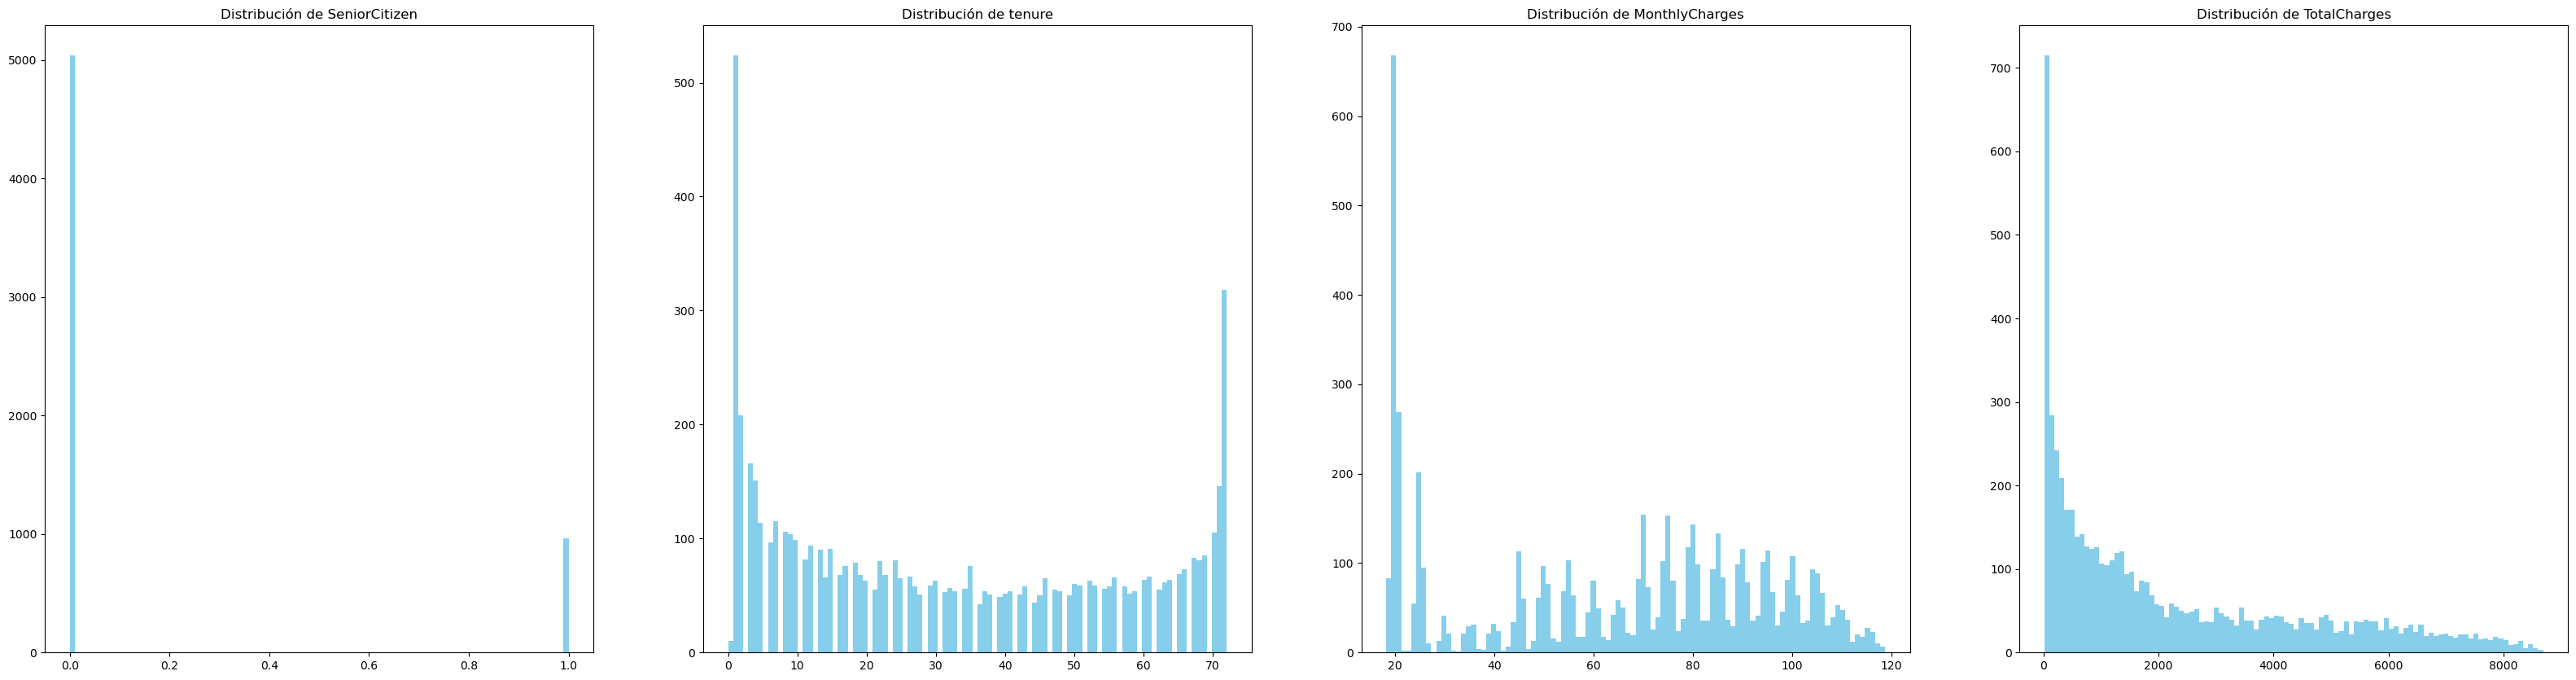

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols= 4, figsize=(40,10))

for i in range (0,len(numerical_columns)):
  axes[i].hist(churn_df[numerical_columns[i]], color='skyblue', bins=100)
  axes[i].set_title(f'Distribución de {numerical_columns[i]}')
plt.show()

In [ ]:
 correlation = churn_df[numerical_columns].corr(),
 correlation

(                SeniorCitizen    tenure  MonthlyCharges  TotalCharges
 SeniorCitizen        1.000000  0.014994        0.217952      0.099310
 tenure               0.014994  1.000000        0.255071      0.826872
 MonthlyCharges       0.217952  0.255071        1.000000      0.654044
 TotalCharges         0.099310  0.826872        0.654044      1.000000,)

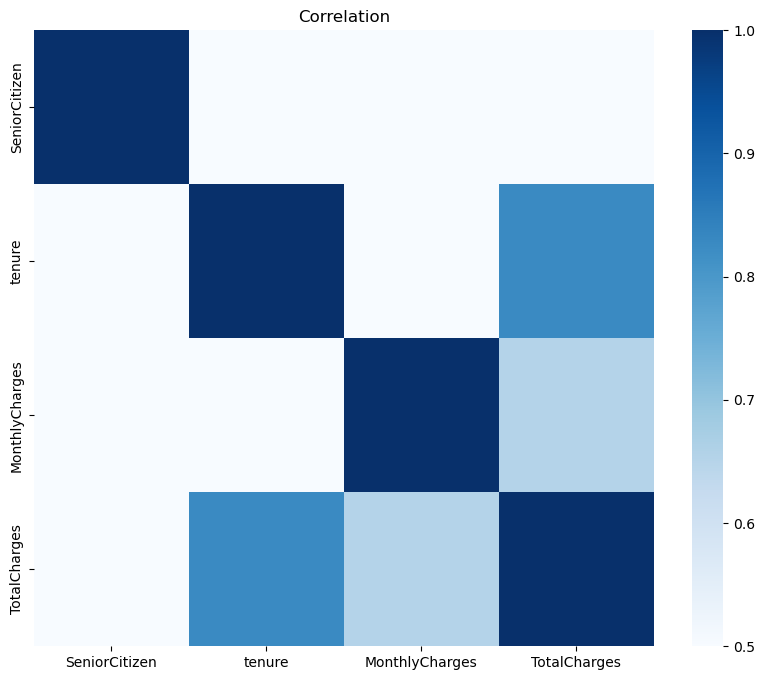

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    churn_df[numerical_columns].corr(),
    vmin=0.5, vmax=1,
    cmap="Blues"
)
plt.title("Correlation")
plt.show()

In [ ]:
churn_df.describe(include=[object])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000
unique,6000,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3049,3097,4189,5410,2883,2624,2965,2623,2620,2950,2380,2356,3293,3510,2030,4408


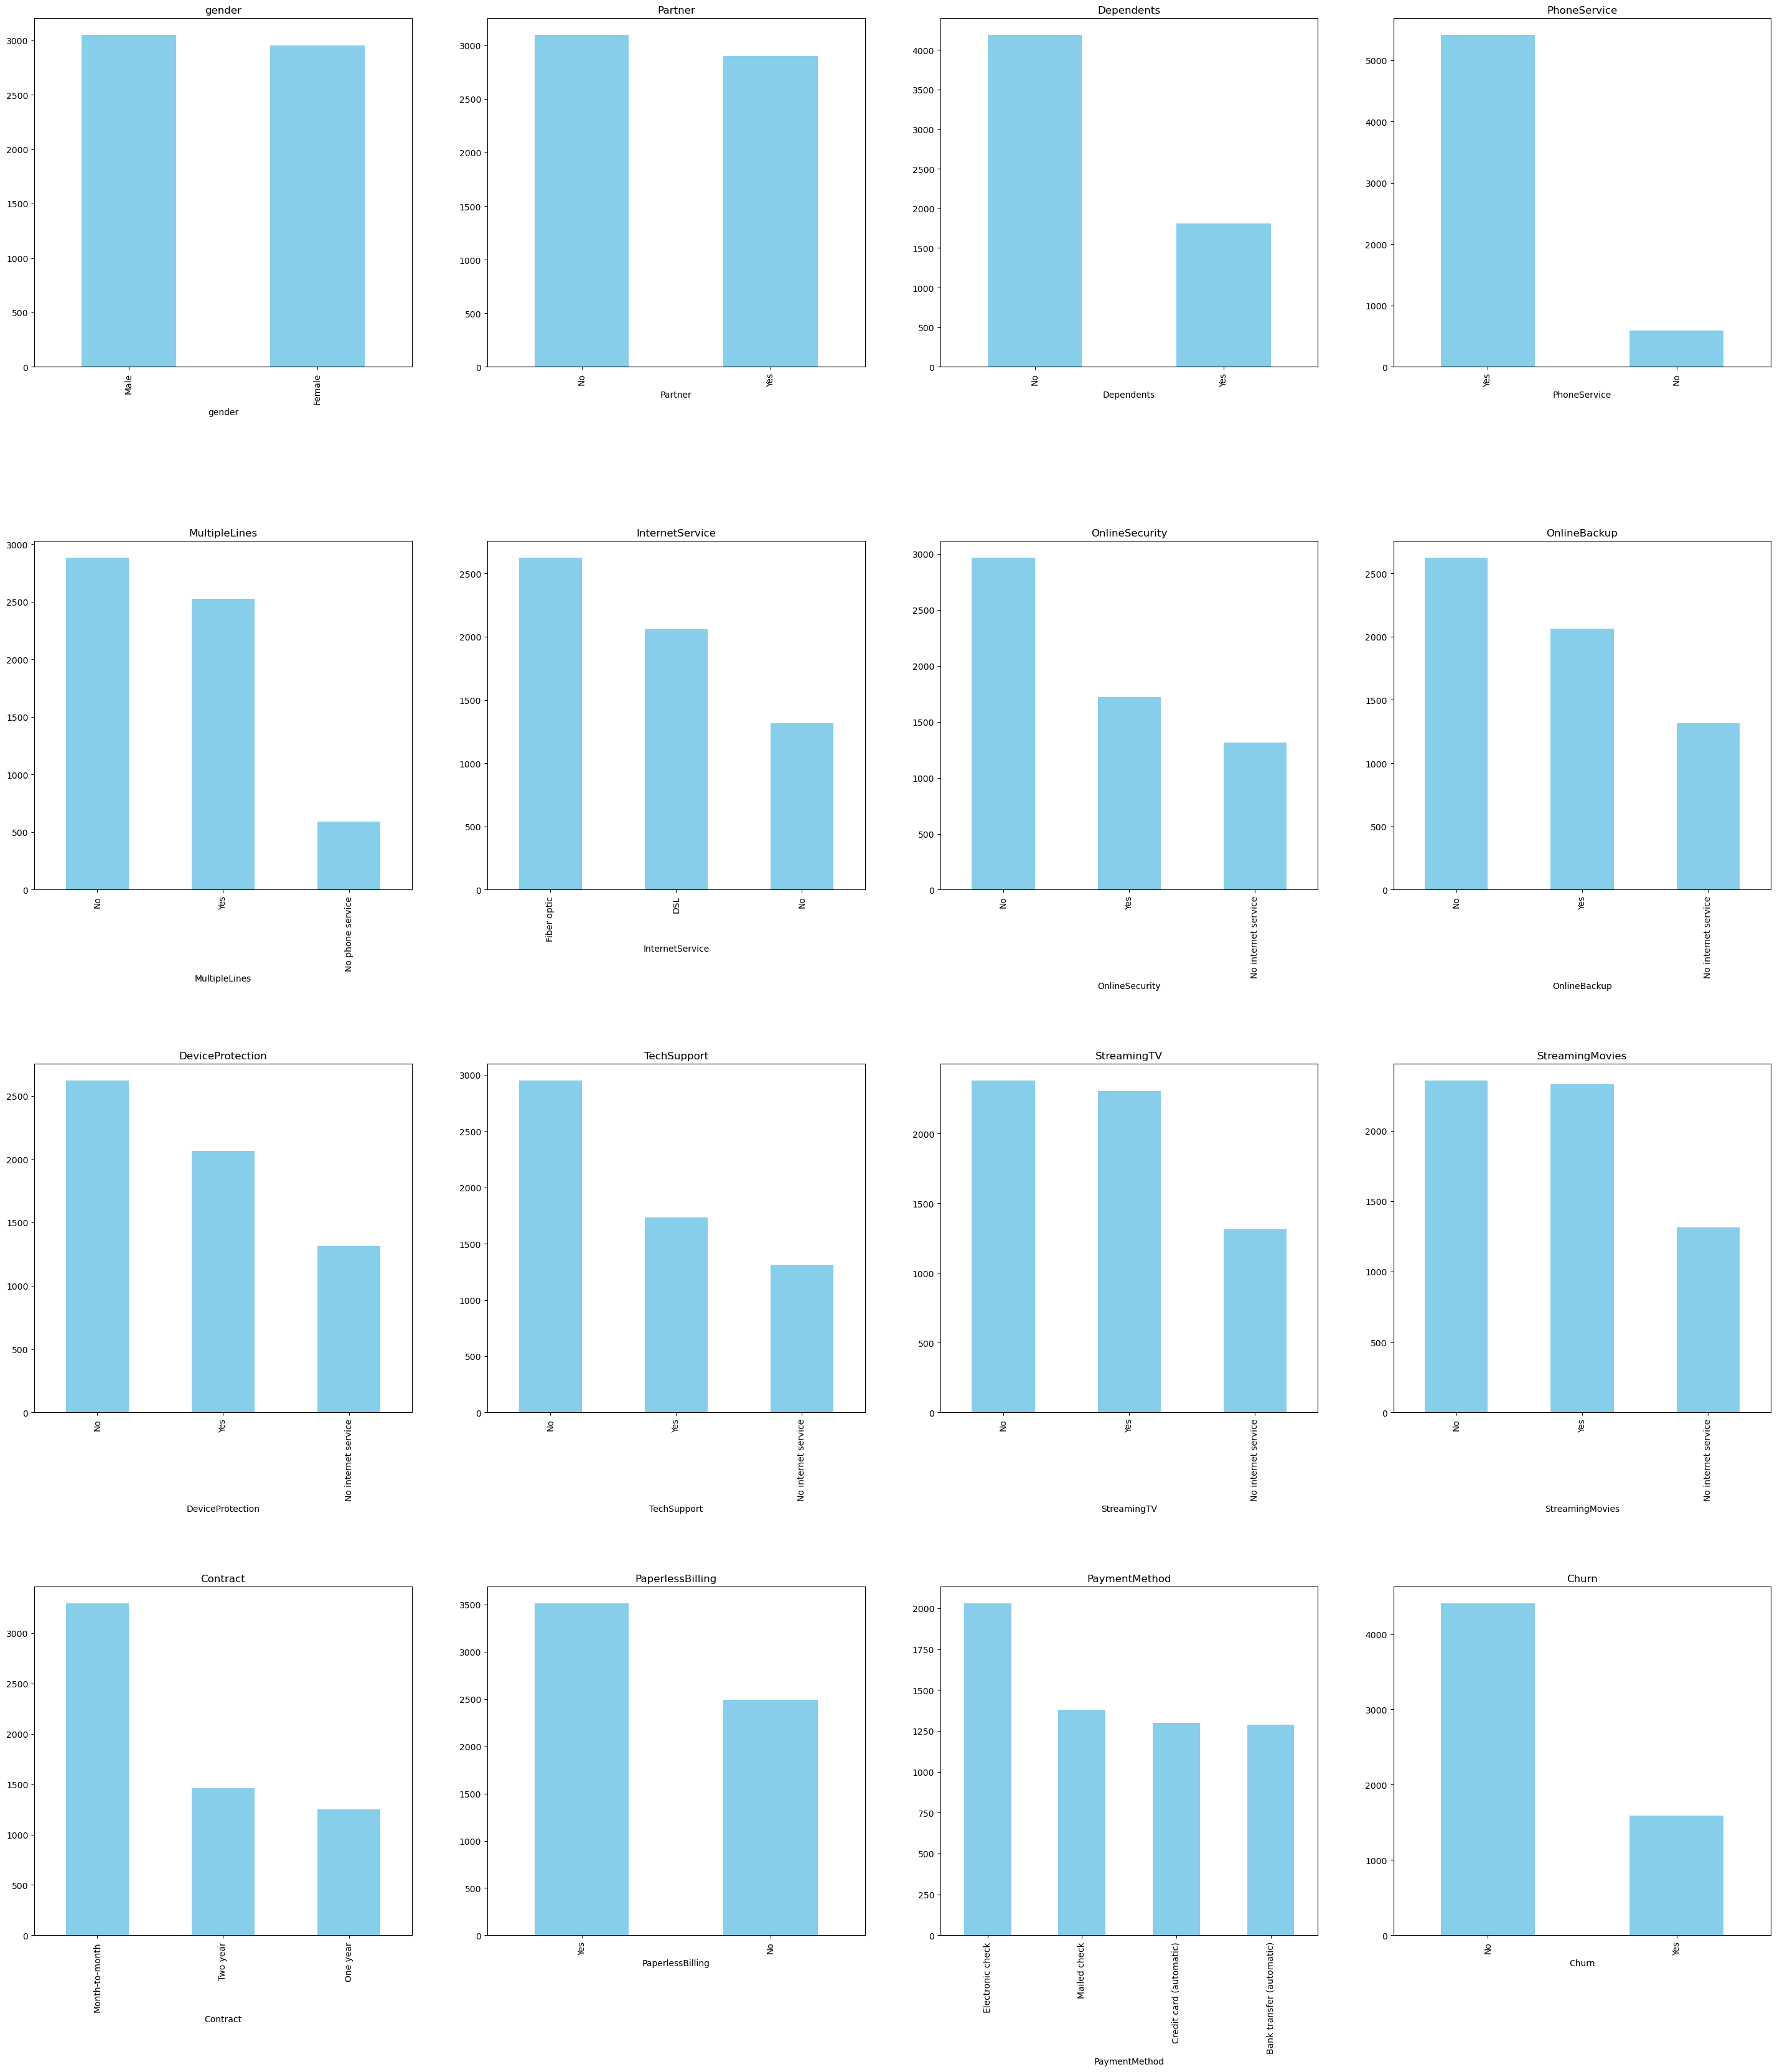

In [ ]:
# No se realiza diagrama de barras de customerID ya que son valores únicos
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(36, 40))
fig.subplots_adjust(hspace=0.5)
for i in range(4):
    for j in range(4):
        index = i * 4 + j
        if index < len(categorical_columns):
            column_name = categorical_columns[index]
            churn_df[column_name].value_counts().plot(kind='bar', ax=axes[i, j], color='skyblue')
            axes[i, j].set_title(column_name)

# **1. [20%] Integración del proceso de transformación de datos, entrenamiento y predicción:**

podemos eliminar los ids ya que son valores unicos y no aportarían al modelo, y contamos con 16 variables categóricas que debemos transformar en variables cuantitativas.

Además, el campo TotalCharges puede contar con datos nulos, como en el análisis exploratorio observamos que no están uniformemente distribuidos, utilizaremos la mediaan para imputar estos valores

En el pipeline base se agregará un clasificador K Nearest Neighbor.

In [ ]:
categorical_columns.remove("Churn")

In [ ]:
# Codificar la variable de salida
le = LabelEncoder()
churn_df["Churn"] = le.fit_transform(churn_df["Churn"])

In [ ]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(churn_df, churn_df["Churn"], test_size=0.2, random_state=42)

In [ ]:
def drop_columns(X):
    return X.drop(["customerID","Churn"], axis=1)
drop_columns_func = FunctionTransformer(drop_columns)
encoder = ColumnTransformer(transformers = [
    ('imputen', SimpleImputer(strategy='median'), ["TotalCharges"]),
    ('encoding', OneHotEncoder(sparse=True), categorical_columns)
        ], remainder="passthrough")

In [ ]:
pipeline = Pipeline(steps = [
    ('drop_columns', drop_columns_func),
    ('encoder', encoder),
    ('classifier', KNeighborsClassifier())
])

In [ ]:
pipeline.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('drop_columns',
                 FunctionTransformer(func=<function drop_columns at 0x00000205BC94F4C0>)),
                ('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('imputen',
                                                  SimpleImputer(strategy='median'),
                                                  ['TotalCharges']),
                                                 ('encoding',
                                                  OneHotEncoder(sparse=True),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('classifier', KNeighborsClassifier())])

# **2. [10%] Entrenamiento de un modelo baseline:**

Para el primer modelo encontramos una aproximación no muy buena,
* para los datos de entrenamiento, se cuenta con 6% de falsos negativos y un 11% de falsos positivos.
* para los datos de prueba, se cuenta con 8.5% de falsos negativos y un 15% de falsos positivos.

* El ROC AUC es de un 75% para entrenamiento y un 67% para prueba, lo que implica una mejora sobre una selección aleatoria.

* Para los datos de entrenamiento; un 72% de instancias positivas que fueron clasificadas son realmente positivas, y el 58% de instancias positivas fueron correctamente clasificadas; obteniendo un F1 del 64%
* Para los datos de prueba; un 60% de instancias positivas que fueron clasificadas son realmente positivas, y el 45% de instancias positivas fueron correctamente clasificadas; obteniendo un F1 del 52%

Es un modelo un poco mejor que una selección aleatoria, sin embargo esta mejoría no es muy significativa por lo que se puede mejorar buscando otro tipo de algoritmo e hiperparámetros que mejoren estos valores


In [ ]:
train_preds_knn = pipeline.predict(X_train)
test_preds_knn =  pipeline.predict(X_test)

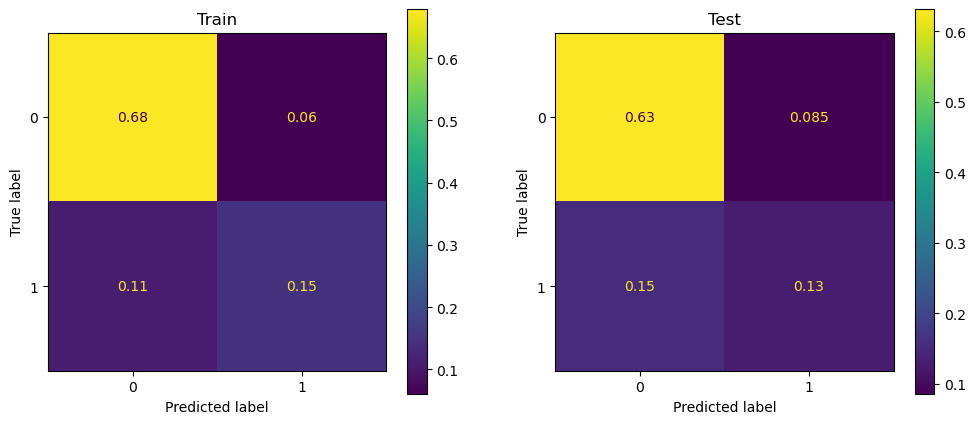

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

train_cm = confusion_matrix(y_train, train_preds_knn, labels=pipeline.classes_, normalize="all")
train_val_disp = ConfusionMatrixDisplay(confusion_matrix=train_cm, display_labels=pipeline.classes_)
train_val_disp.plot(ax=axes[0])
axes[0].set_title("Train")

test_cm = confusion_matrix(y_test, test_preds_knn, labels=pipeline.classes_, normalize="all")
test_disp = ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=pipeline.classes_)
test_disp.plot(ax=axes[1])
axes[1].set_title("Test")

plt.show()

Text(0.5, 1.0, 'Test')

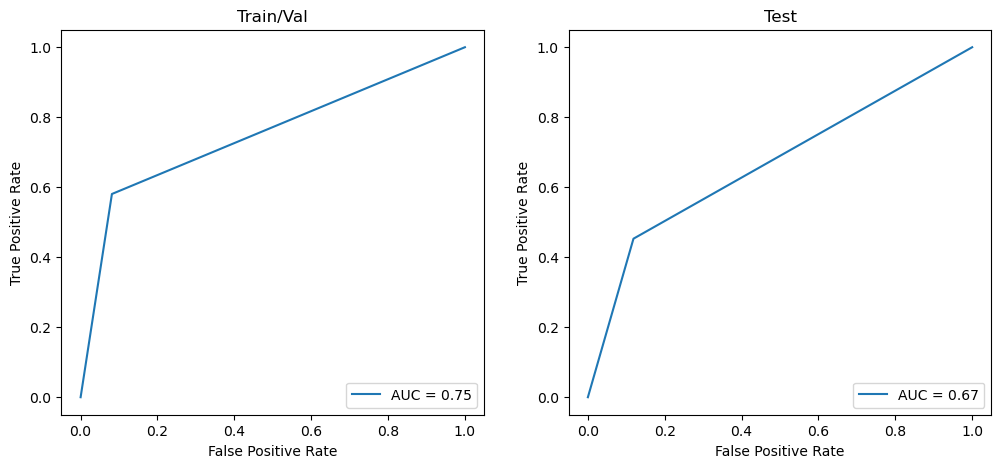

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

fpr, tpr, thresholds = roc_curve(y_train, train_preds_knn)
area = auc(fpr, tpr)
train_val_disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=area)
train_val_disp.plot(ax=axes[0])
axes[0].set_title("Train/Val")

fpr, tpr, thresholds = roc_curve(y_test, test_preds_knn)
area = auc(fpr, tpr)
test_disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=area)
test_disp.plot(ax=axes[1])
axes[1].set_title("Test")

In [ ]:
print("Precision:")
print("- Train/Val:", precision_score(y_train, train_preds_knn))
print("- Test:", precision_score(y_test, test_preds_knn))
print("\nRecall:")
print("- Train/Val:", recall_score(y_train, train_preds_knn))
print("- Test:", recall_score(y_test, test_preds_knn))
print("\nF1:")
print("- Train/Val:", f1_score(y_train, train_preds_knn))
print("- Test:", f1_score(y_test, test_preds_knn))
print("\nROC AUC:")
print("- Train/Val:", roc_auc_score(y_train, train_preds_knn))
print("- Test:", roc_auc_score(y_test, test_preds_knn))

Precision:
- Train/Val: 0.7155511811023622
- Test: 0.6015625

Recall:
- Train/Val: 0.5806709265175719
- Test: 0.45294117647058824

F1:
- Train/Val: 0.6410934744268078
- Test: 0.5167785234899329

ROC AUC:
- Train/Val: 0.7496082930220329
- Test: 0.6671682626538987


# **3. [20%] Selección automática del mejor modelo:**

Se buscará el mejor modelo entre tres: LogisticRegression, RandomForestClassifier y Suppor Vector Machines y se optimizarán tanto F1 como ROC AUC

In [ ]:
# Crear pipelines para cada algoritmo
logreg_pipe = Pipeline([
    ('drop_columns', drop_columns_func),
    ('encoder', encoder),
    ('logreg', LogisticRegression())
])

svm_pipe = Pipeline([
    ('drop_columns', drop_columns_func),
    ('encoder', encoder),
    ('svm', SVC())
])

rf_pipe = Pipeline([
    ('drop_columns', drop_columns_func),
    ('encoder', encoder),
    ('rf', RandomForestClassifier())
])
# Definir los conjuntos de hiperparámetros para cada algoritmo
param_grid_logreg = {
    'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100],
}

param_grid_svm = {
    'svm__C': [0.1, 1, 10],
    'svm__kernel': ['linear', 'rbf', 'poly'],
}

param_grid_rf = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [None, 10, 20],
}
# Crear diccionario con modelos y sus parámetros
models = {
    'Logistic Regression': (logreg_pipe, param_grid_logreg),
    'SVM': (svm_pipe, param_grid_svm),
    'Random Forest': (rf_pipe, param_grid_rf),
}
scoring = {'F1': make_scorer(f1_score), 'ROC_AUC': make_scorer(roc_auc_score)}

In [ ]:
# Realizar la búsqueda en grilla con validación cruzada
results = {}
for model_name, (model, params) in models.items():
    grid_search = GridSearchCV(model, params, scoring=scoring, refit='F1', cv=5)
    grid_search.fit(X_train, y_train)
    results[model_name] = grid_search

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMI

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unles

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of itera

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

In [ ]:
# Imprimir los resultados
for model_name, grid_search in results.items():
    print(f"Resultados para {model_name}:")
    print(f"Mejores parámetros: {grid_search.best_params_}")
    print(f"Mejor index: {grid_search.best_index_}")
    print(f"Puntajes F1 en validación cruzada: {grid_search.cv_results_['mean_test_F1'][grid_search.best_index_]}")
    print(f"Puntajes ROC AUC en validación cruzada: {grid_search.cv_results_['mean_test_ROC_AUC'][grid_search.best_index_]}")
    print(f"mejor puntaje: {grid_search.best_score_}")
    if model_name == 'Logistic Regression':
      logreg_model = grid_search.best_estimator_
    elif model_name == 'SVM':
      svm_model = grid_search.best_estimator_
    else:
      rf_model = grid_search.best_estimator_

Resultados para Logistic Regression:
Mejores parámetros: {'logreg__C': 0.1}
Mejor index: 2
Puntajes F1 en validación cruzada: 0.5881165235413393
Puntajes ROC AUC en validación cruzada: 0.7174269857220634
mejor puntaje: 0.5881165235413393
Resultados para SVM:
Mejores parámetros: {'svm__C': 0.1, 'svm__kernel': 'linear'}
Mejor index: 0
Puntajes F1 en validación cruzada: 0.5585683198952452
Puntajes ROC AUC en validación cruzada: 0.6983654146638777
mejor puntaje: 0.5585683198952452
Resultados para Random Forest:
Mejores parámetros: {'rf__max_depth': 10, 'rf__n_estimators': 50}
Mejor index: 3
Puntajes F1 en validación cruzada: 0.5715757556288766
Puntajes ROC AUC en validación cruzada: 0.706571073112346
mejor puntaje: 0.5715757556288766


## **3.1. Aspectos relevantes de los mejores modelos**

Se observa que de todos los modelos escogidos, Random Forest fue el mejor de todos, en la sección 3.1.3 y 3.2 se detallan los aspectos encontrados.

### **3.1.1 Regresión Logística**
Para este modelo, el mejor hiperparámetro fue con una regularización de 0.1

* para los datos de entrenamiento, se cuenta con 7.2% de falsos negativos y un 12% de falsos positivos.
* para los datos de prueba, se cuenta con 6.8% de falsos negativos y un 14% de falsos positivos.

* El ROC AUC es de un 72% para entrenamiento y un 71% para prueba.

* Para los datos de entrenamiento; un 66% de instancias positivas que fueron clasificadas son realmente positivas, y el 53% de instancias positivas fueron correctamente clasificadas; obteniendo un F1 del 59%
* Para los datos de prueba; un 68% de instancias positivas que fueron clasificadas son realmente positivas, y el 51% de instancias positivas fueron correctamente clasificadas; obteniendo un F1 del 58%

Aunque a primera vista las métricas de error son un poco más bajas que el modelo baseline para datos de entrenamiento, se observa un poco de mejora en las predicciones para datos de prueba en todas las métricas. podemos decir que este modelo es mejor que el baseline; sin embargo no es el más acertado

In [ ]:
train_preds_logreg = logreg_model.predict(X_train)
test_preds_logreg =  logreg_model.predict(X_test)

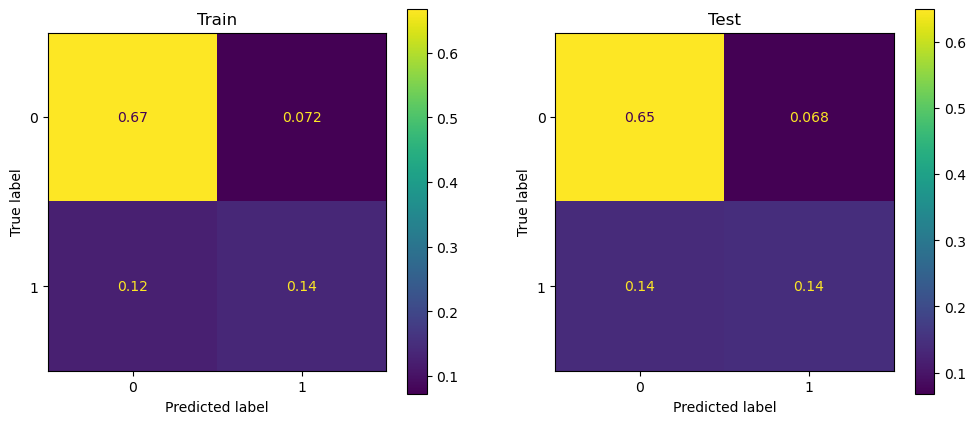

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

train_cm = confusion_matrix(y_train, train_preds_logreg, labels=logreg_model.classes_, normalize="all")
train_val_disp = ConfusionMatrixDisplay(confusion_matrix=train_cm, display_labels=logreg_model.classes_)
train_val_disp.plot(ax=axes[0])
axes[0].set_title("Train")

test_cm = confusion_matrix(y_test, test_preds_logreg, labels=logreg_model.classes_, normalize="all")
test_disp = ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=logreg_model.classes_)
test_disp.plot(ax=axes[1])
axes[1].set_title("Test")

plt.show()

Text(0.5, 1.0, 'Test')

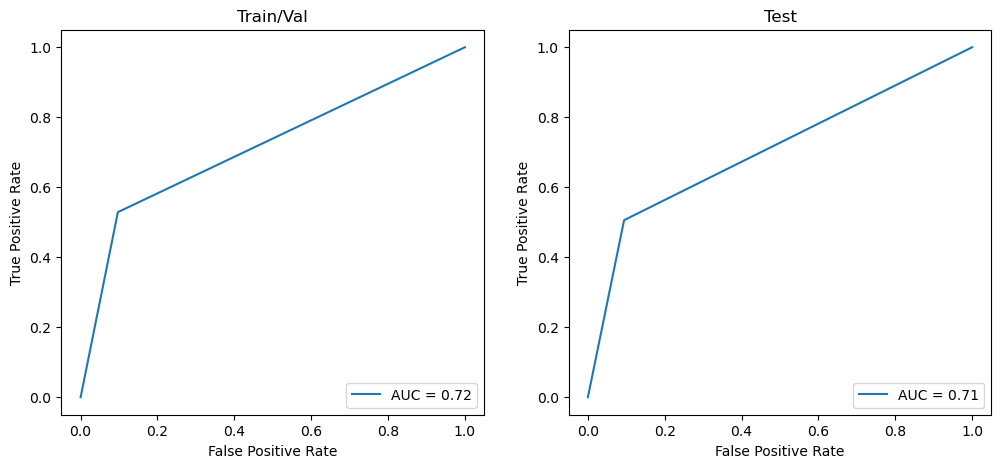

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

fpr, tpr, thresholds = roc_curve(y_train, train_preds_logreg)
area = auc(fpr, tpr)
train_val_disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=area)
train_val_disp.plot(ax=axes[0])
axes[0].set_title("Train/Val")

fpr, tpr, thresholds = roc_curve(y_test, test_preds_logreg)
area = auc(fpr, tpr)
test_disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=area)
test_disp.plot(ax=axes[1])
axes[1].set_title("Test")

In [ ]:
print("Precision:")
print("- Train/Val:", precision_score(y_train, train_preds_logreg))
print("- Test:", precision_score(y_test, test_preds_logreg))
print("\nRecall:")
print("- Train/Val:", recall_score(y_train, train_preds_logreg))
print("- Test:", recall_score(y_test, test_preds_logreg))
print("\nF1:")
print("- Train/Val:", f1_score(y_train, train_preds_logreg))
print("- Test:", f1_score(y_test, test_preds_logreg))
print("\nROC AUC:")
print("- Train/Val:", roc_auc_score(y_train, train_preds_logreg))
print("- Test:", roc_auc_score(y_test, test_preds_logreg))

Precision:
- Train/Val: 0.658051689860835
- Test: 0.6798418972332015

Recall:
- Train/Val: 0.5287539936102237
- Test: 0.5058823529411764

F1:
- Train/Val: 0.5863596102745793
- Test: 0.5801011804384485

ROC AUC:
- Train/Val: 0.7158989810215718
- Test: 0.7058481532147742


### **3.1.2 SVM**
para este modelo  se utilizó un kernel linear y una regularización de 0.1

* para los datos de entrenamiento, se cuenta con 6.1% de falsos negativos y un 14% de falsos positivos.
* para los datos de prueba, se cuenta con 6.3% de falsos negativos y un 15% de falsos positivos.

* El ROC AUC es de un 70% para entrenamiento y un 68% para prueba, lo que implica una mejora sobre una selección aleatoria.

* Para los datos de entrenamiento; un 67% de instancias positivas que fueron clasificadas son realmente positivas, y el 48% de instancias positivas fueron correctamente clasificadas; obteniendo un F1 del 56%
* Para los datos de prueba; un 67% de instancias positivas que fueron clasificadas son realmente positivas, y el 45% de instancias positivas fueron correctamente clasificadas; obteniendo un F1 del 54%

Al igual que el modelo anterior, la métricas de error son un poco más bajas que el modelo baseline para datos de entrenamiento, se observa un poco de mejora en las predicciones para datos de prueba en todas las métricas. sin embargo estas mejoras son del 1 a 2 % por lo que no son significativas.

In [ ]:
train_preds_svm = svm_model.predict(X_train)
test_preds_svm =  svm_model.predict(X_test)

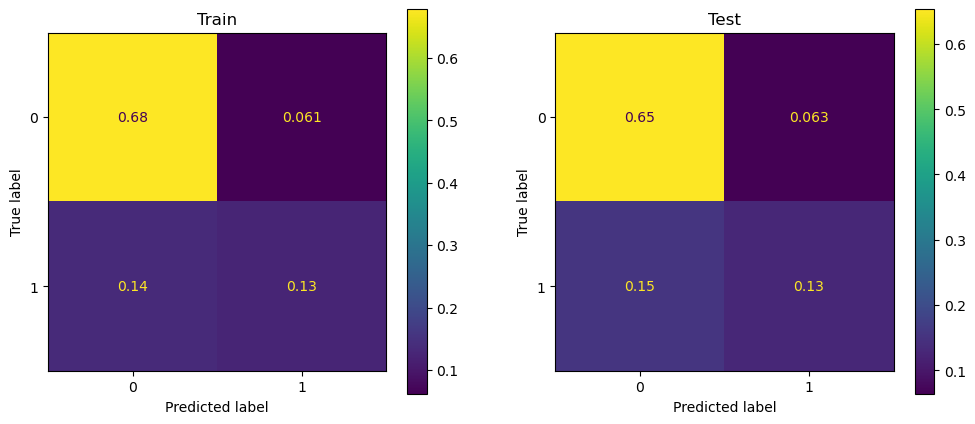

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

train_cm = confusion_matrix(y_train, train_preds_svm, labels=svm_model.classes_, normalize="all")
train_val_disp = ConfusionMatrixDisplay(confusion_matrix=train_cm, display_labels=svm_model.classes_)
train_val_disp.plot(ax=axes[0])
axes[0].set_title("Train")

test_cm = confusion_matrix(y_test, test_preds_svm, labels=svm_model.classes_, normalize="all")
test_disp = ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=svm_model.classes_)
test_disp.plot(ax=axes[1])
axes[1].set_title("Test")

plt.show()

Text(0.5, 1.0, 'Test')

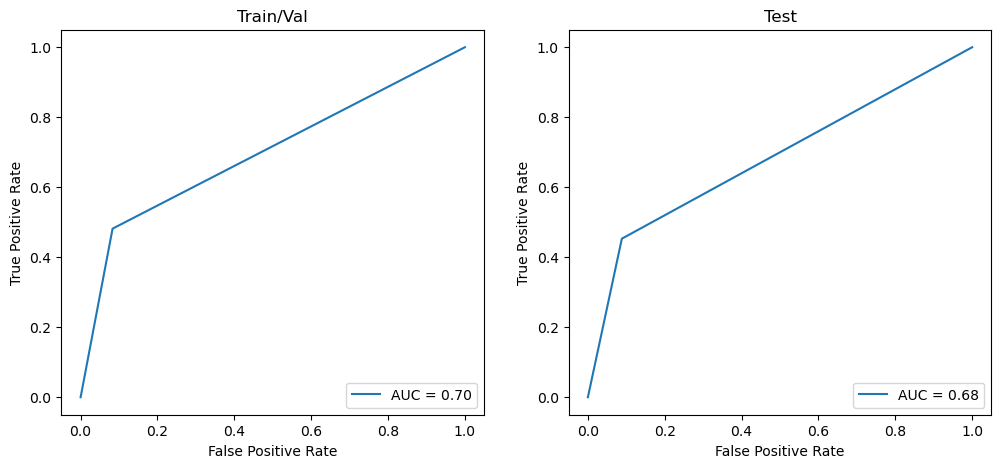

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

fpr, tpr, thresholds = roc_curve(y_train, train_preds_svm)
area = auc(fpr, tpr)
train_val_disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=area)
train_val_disp.plot(ax=axes[0])
axes[0].set_title("Train/Val")

fpr, tpr, thresholds = roc_curve(y_test, test_preds_svm)
area = auc(fpr, tpr)
test_disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=area)
test_disp.plot(ax=axes[1])
axes[1].set_title("Test")

In [ ]:
print("Precision:")
print("- Train/Val:", precision_score(y_train, train_preds_svm))
print("- Test:", precision_score(y_test, test_preds_svm))
print("\nRecall:")
print("- Train/Val:", recall_score(y_train, train_preds_svm))
print("- Test:", recall_score(y_test, test_preds_svm))
print("\nF1:")
print("- Train/Val:", f1_score(y_train, train_preds_svm))
print("- Test:", f1_score(y_test, test_preds_svm))
print("\nROC AUC:")
print("- Train/Val:", roc_auc_score(y_train, train_preds_svm))
print("- Test:", roc_auc_score(y_test, test_preds_svm))

Precision:
- Train/Val: 0.6714922048997772
- Test: 0.6695652173913044

Recall:
- Train/Val: 0.481629392971246
- Test: 0.45294117647058824

F1:
- Train/Val: 0.5609302325581396
- Test: 0.5403508771929825

ROC AUC:
- Train/Val: 0.6992419794619477
- Test: 0.6822845417236663


### **3.1.3 Random Forest**
Para este modelo, se utilizaron 50 árboles y se especificó una profundidad máxima de 10 para estos.

* para los datos de entrenamiento, se cuenta con 4.1% de falsos negativos y un 7% de falsos positivos.
* para los datos de prueba, se cuenta con 7.5% de falsos negativos y un 14% de falsos positivos.

* El ROC AUC es de un 82% para entrenamiento y un 70% para prueba, lo que implica una mejora sobre los anteriores modelos.

* Para los datos de entrenamiento; un 82% de instancias positivas que fueron clasificadas son realmente positivas, y el 70% de instancias positivas fueron correctamente clasificadas; obteniendo un F1 del 76%
* Para los datos de prueba; un 66% de instancias positivas que fueron clasificadas son realmente positivas, y el 51% de instancias positivas fueron correctamente clasificadas; obteniendo un F1 del 58%

Para este modelo, se observan mejoras en las métricas tanto para datos de entrenamiento como prueba, bajaron los valores de la matriz de confusión para falsos positivos y negativos; el área bajo la cura ROC subió significativamente acercandose más al 1 esperado, y las métricas de recall, precision y F1 mejoraron significativamente tanto en entrenamiento y prueba.

In [ ]:
train_preds_rf = rf_model.predict(X_train)
test_preds_rf =  rf_model.predict(X_test)

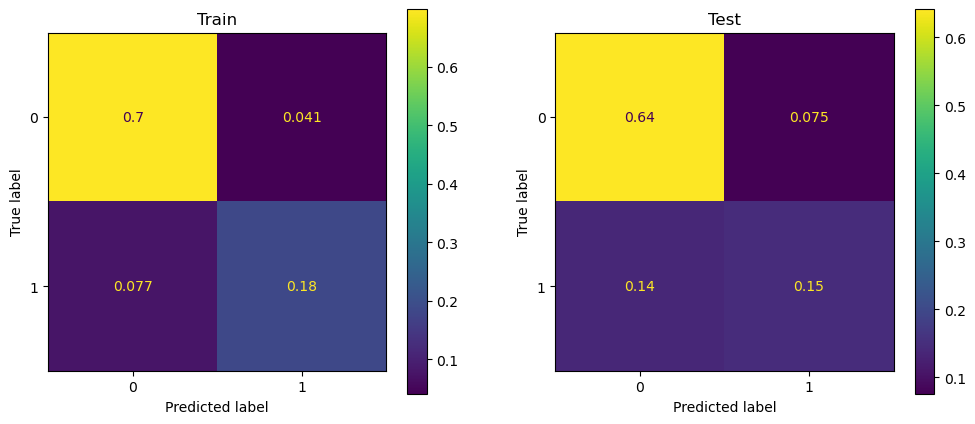

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

train_cm = confusion_matrix(y_train, train_preds_rf, labels=rf_model.classes_, normalize="all")
train_val_disp = ConfusionMatrixDisplay(confusion_matrix=train_cm, display_labels=rf_model.classes_)
train_val_disp.plot(ax=axes[0])
axes[0].set_title("Train")

test_cm = confusion_matrix(y_test, test_preds_rf, labels=rf_model.classes_, normalize="all")
test_disp = ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=rf_model.classes_)
test_disp.plot(ax=axes[1])
axes[1].set_title("Test")

plt.show()

Text(0.5, 1.0, 'Test')

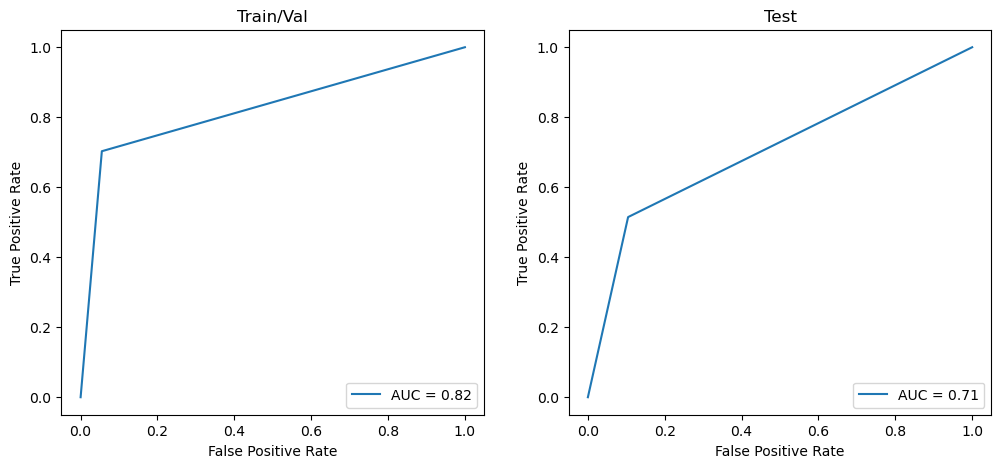

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

fpr, tpr, thresholds = roc_curve(y_train, train_preds_rf)
area = auc(fpr, tpr)
train_val_disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=area)
train_val_disp.plot(ax=axes[0])
axes[0].set_title("Train/Val")

fpr, tpr, thresholds = roc_curve(y_test, test_preds_rf)
area = auc(fpr, tpr)
test_disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=area)
test_disp.plot(ax=axes[1])
axes[1].set_title("Test")

In [ ]:
print("Precision:")
print("- Train/Val:", precision_score(y_train, train_preds_rf))
print("- Test:", precision_score(y_test, test_preds_rf))
print("\nRecall:")
print("- Train/Val:", recall_score(y_train, train_preds_rf))
print("- Test:", recall_score(y_test, test_preds_rf))
print("\nF1:")
print("- Train/Val:", f1_score(y_train, train_preds_rf))
print("- Test:", f1_score(y_test, test_preds_rf))
print("\nROC AUC:")
print("- Train/Val:", roc_auc_score(y_train, train_preds_rf))
print("- Test:", roc_auc_score(y_test, test_preds_rf))

Precision:
- Train/Val: 0.8178438661710037
- Test: 0.660377358490566

Recall:
- Train/Val: 0.7028753993610224
- Test: 0.5147058823529411

F1:
- Train/Val: 0.7560137457044674
- Test: 0.5785123966942147

ROC AUC:
- Train/Val: 0.8238165046410523
- Test: 0.7050273597811217


## **3.2. Overfitting y Underfitting**

Tanto para el modelo baseline (KNN), Logistic Regression y SVM se observan problemas de underfitting, ya que no alcanzan valores buenos en ninguna de las métricas tanto en entrenamiento como en test. La solución podría encontrarse agregando más datos en entrenamiento, ya que contabamos con 4800 registros para entrenarlos.

Sin embargo, se observa una mejora en el último modelo evaluado (Random Forest); aunque los valores no son perfectos, consideramos que son aceptables. pero al contrastar las métricas con los datos de prueba observamos un overfitting ya que las métricas de train son buenas, bajan significativamente con datos de test. Para este caso; se podría reducir la complejidad del modelo; eliminando ciertas variables de entrada ya que se tomaron todas.